In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
import analysis.yinf as yinf
import analysis.products as products
import analysis.util as util
from data.util import *
import os, sys, re
from scipy.stats import gaussian_kde, linregress, binned_statistic
ML_DIR = os.path.expandvars("$SCRATCH/mlreco_cell/")
NETS = dict(enumerate(sorted([d for d in os.listdir(os.path.expandvars(ML_DIR))])))
SIM_DIR = os.path.expandvars("$SCRATCH/larsim/")
SIMS = dict(enumerate(sorted([d for d in os.listdir(os.path.expandvars(SIM_DIR)) if "reco" in d])))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Charge Solving

In [ ]:
index = 2
event = 2
#index = 1
#event = 4
lims=None
lims = ((0, 5550), None, None)
#lims=((100, 400), (0,400), None)
#lims = ((600, 800), (300, 400), (0, 100))
yinf.plot_yinf_simple(plt.figure(), None, event, 0, 1, 0.5/3, lims, 
                      xy_dir=SIM_DIR+"reco_1GeV_BeamCosmic_xy/", yinf_file="../ml/test/epoch24-batch0-reco_BeamCosmic_%03d_yinf-TPC1.npz"%index)
yinf.plot_yinf_simple(plt.figure(), None, event, -1000, 1, 0.5/3, lims, 
                      xy_dir=SIM_DIR+"reco_1GeV_BeamCosmic_xy/", yinf_file="../ml/test/OLS/epoch24-batch0-reco_BeamCosmic_%03d_yinf-TPC1.npz"%index)
products.plot_spacepoint(plt.figure(), None,event , (8, 4, 4), 0, 1, 0.5/3, lims, 
                    spacepoint_file=SIM_DIR+"wirecell_parsed/uniform/reco_1GeV_BeamCosmic_%03d_wirecell-TPC1.npz"%index, truth_file=SIM_DIR+"reco_1GeV_BeamCosmic_parsed-test/reco_BeamCosmic_%03d_depo-TPC1.npz"%index)
products.plot_spacepoint(plt.figure(), None ,event , (8, 4, 4), 0, 1, 0.5/3, ((lims[0][0]-62.5, lims[0][1]-62.5), lims[1], lims[2]), 
                    spacepoint_file=SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_spacepoint-TPC12.npz"%index, truth_file=SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_depo-TPC12.npz"%index)

### SingleElectron

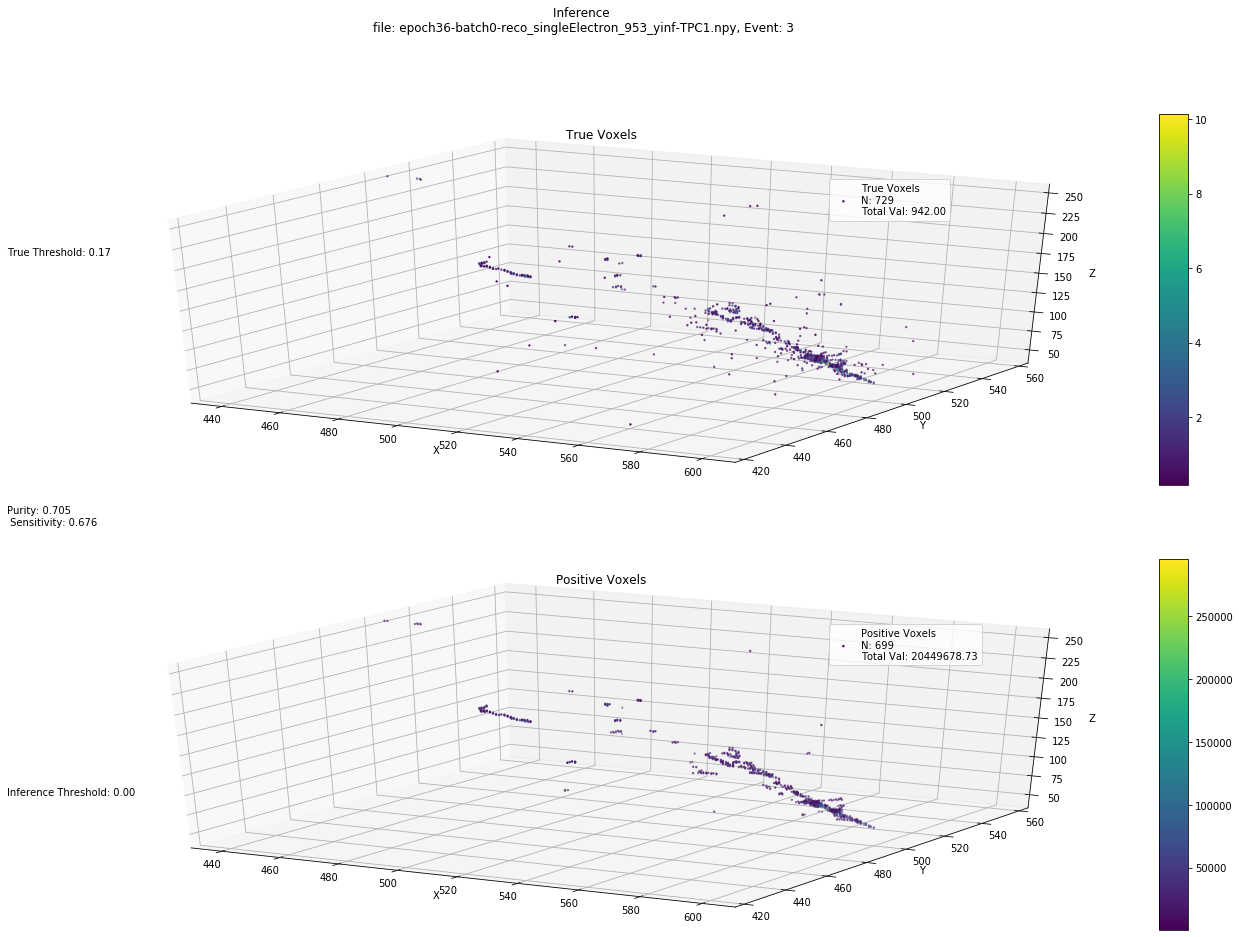

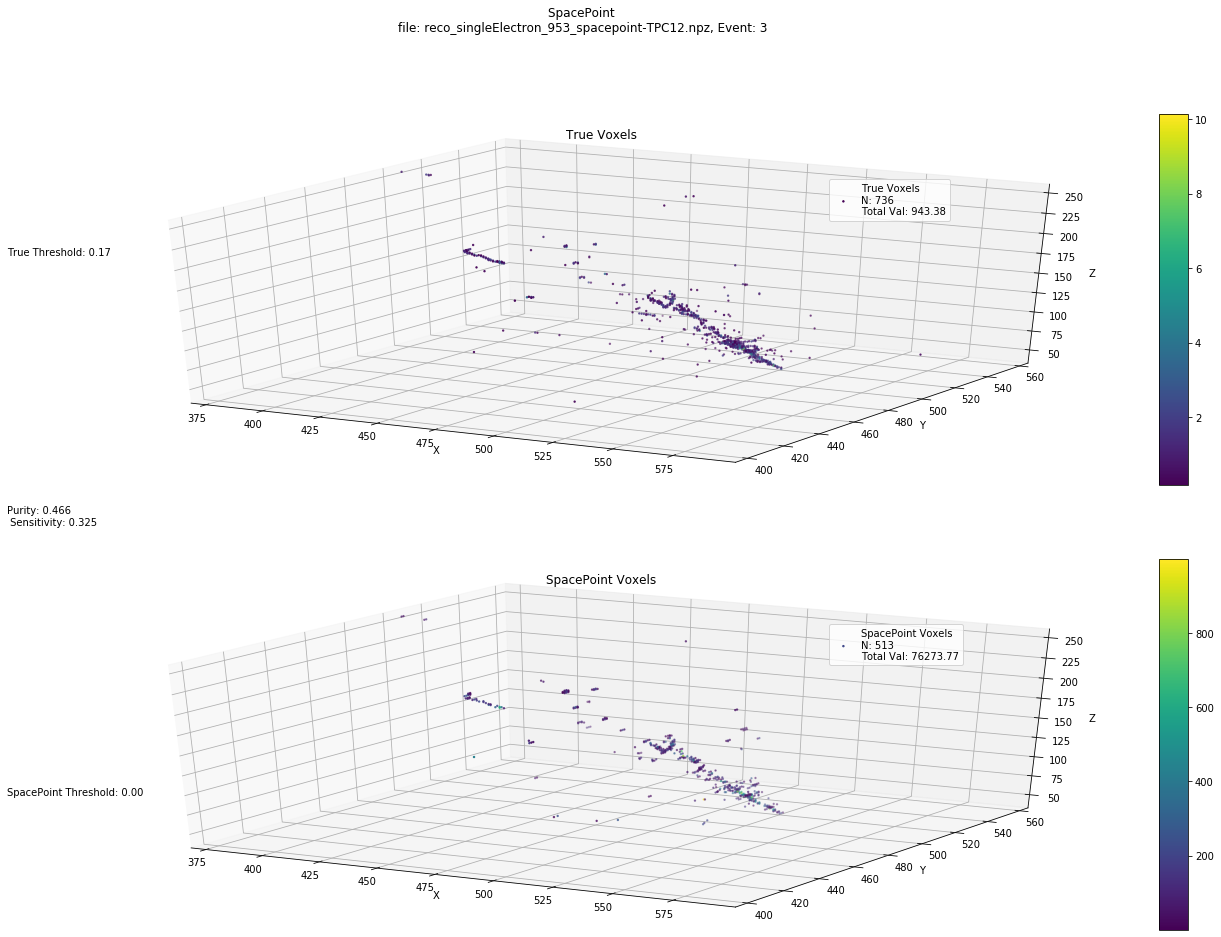

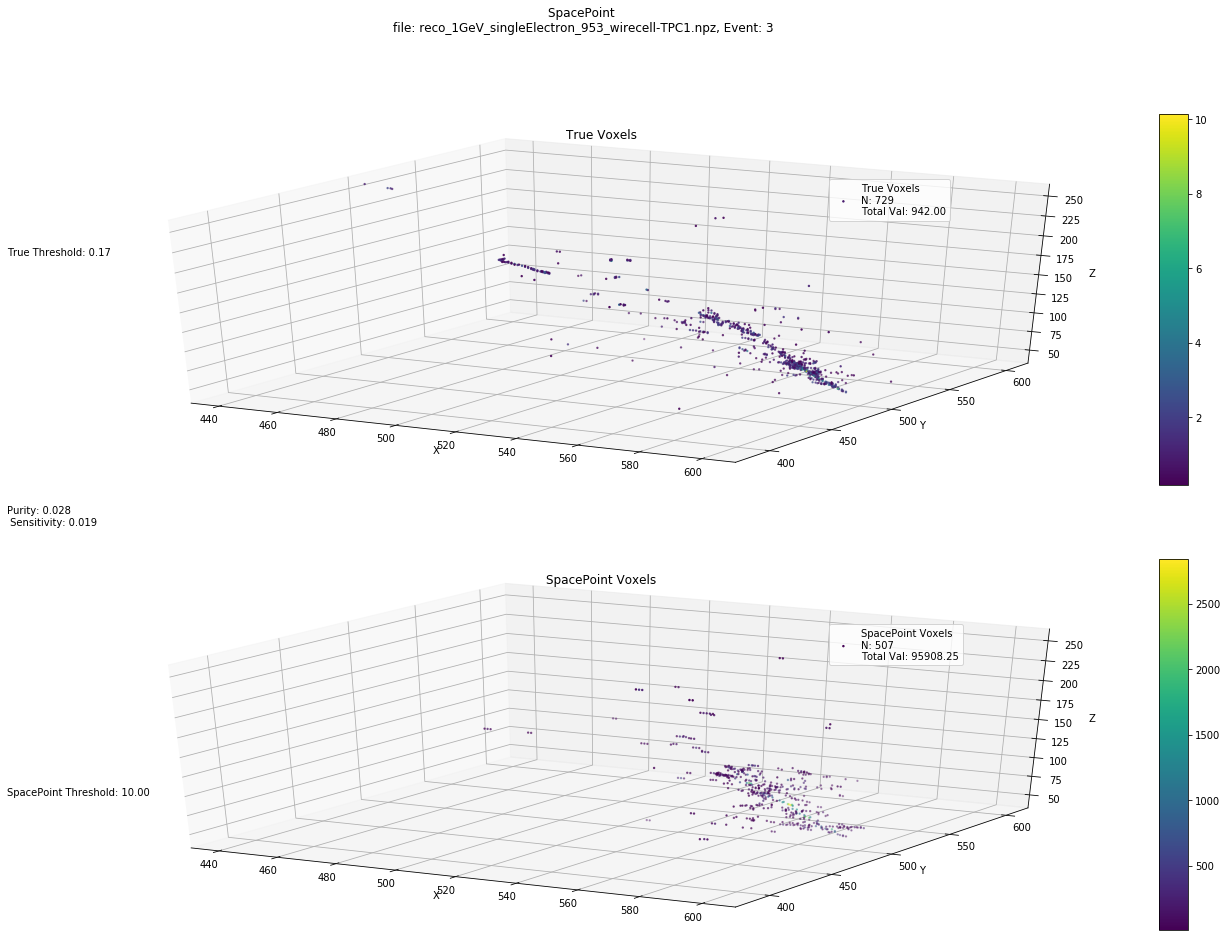

In [3]:
index = 953
event = 3
#products.plot_spacepoint(plt.figure(), None, event , (8, 4, 4), 0, 1/3, 0.5/3, 
                    #spacepoint_file="../tiling/test/Wirecell/reco_singleElectron_%03d_charge-TPC1.npz"%index, truth_file=SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_energy-TPC1.npz"%index)
#yinf.plot_yinf_simple(plt.figure(), None, event, 0, 1, 0, 
                      #xy_dir=SIM_DIR+"reco_1GeV_Electron-depoElec_xy/", yinf_file=ML_DIR+"singleE-depoElec_charge-164-MSE555-lr0.01/inference/epoch33-batch0-reco_singleElectron_%03d_yinf-TPC1.npy"%index)

yinf.plot_yinf_simple(plt.figure(), None, event, 0, 1/3, 0.17, 
                      xy_dir=SIM_DIR+"reco_1GeV_ElectronWire_xy-v3_3/", 
                      yinf_file=(ML_DIR+"singleE-BeamCosmic-depoElec-tpc1_charge-164-lr0.01/inference/epoch36-batch0-reco_singleElectron_%03d_yinf-TPC1.npy"%index,
                                (ML_DIR+"singleE-BeamCosmic-tpc1_ghost3D-164-lr0.01/inference/epoch24-batch0-reco_singleElectron_%03d_yinf-TPC1.npy"%index, 0.35)))
products.plot_spacepoint(plt.figure(), None, event, (8, 4, 4), 0, 1/3, 0.17, 
                    spacepoint_file=SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_spacepoint-TPC12.npz"%index, truth_file=SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_energy-TPC12.npz"%index)
products.plot_spacepoint(plt.figure(), None,event , (8, 4, 4), 10, 1/3, 0.17, 
                    spacepoint_file=SIM_DIR+"wirecell_parsed/center/reco_1GeV_singleElectron_%03d_wirecell-TPC1.npz"%index, truth_file=SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_energy-TPC1.npz"%index)

In [ ]:
with np.load(SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_calonosce-TPC1.npz"%index, allow_pickle=True) as f:
    voxels = []
    names = []
    voxel_planes = [{}, {}, {}]
    QvR = [[], []]
    QvE = [[], []]
    for calo in f["arr_%d"%event]:
        print(calo[1])
        attr, plane, energy = calo[:3]
        pts = np.vstack(calo[3:])
        voxels.append(util.downsample_voxels((8,4,4), {(pt[0]-12, pt[1], pt[2]): pt[3] for pt in pts}, reduce=True)[0])
        names.append(attr+" Plane %d"%plane)
        voxel_planes[plane].update(voxels[-1])
        if plane == 2:
            QvR[1].extend(pts[:, 3])
            QvR[0].extend(pts[:, 5])
            QvE[1].extend(pts[:, 3])
            QvE[0].extend(pts[:, 4])    
    fig = plt.figure()
    util.scatter_voxel(fig, fig.add_subplot(211, projection="3d"), voxel_planes[2])
    util.scatter_voxels(fig, fig.add_subplot(212, projection="3d"), voxels, names)
plt.figure()
plt.plot(*QvR)
plt.figure()
plt.scatter(*QvE, s=5)
voxel_truth = util.downsample_voxels((8,4,4), yinf.parse_yinf(event, SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_energy-TPC1.npz"%index), reduce=True)[0]
util.scatter_voxels_comp(plt.figure(), util.comp_voxels(voxel_truth, voxel_planes[2]))

plt.figure()
plt.hist([[v for k, v in voxel.items()] for voxel in voxel_planes], histtype='step', label=range(3))
plt.legend()
plt.show()


### SingleMu

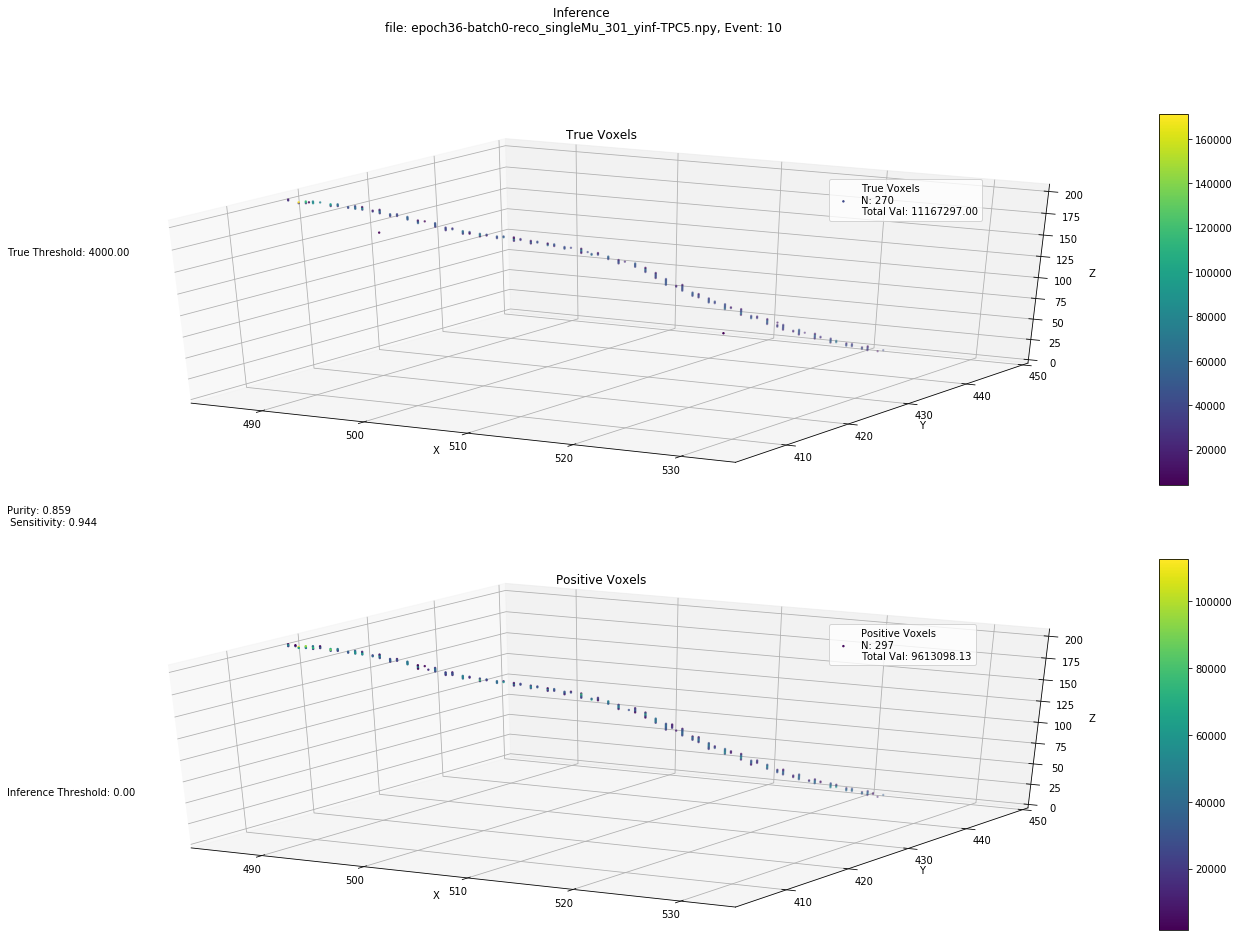

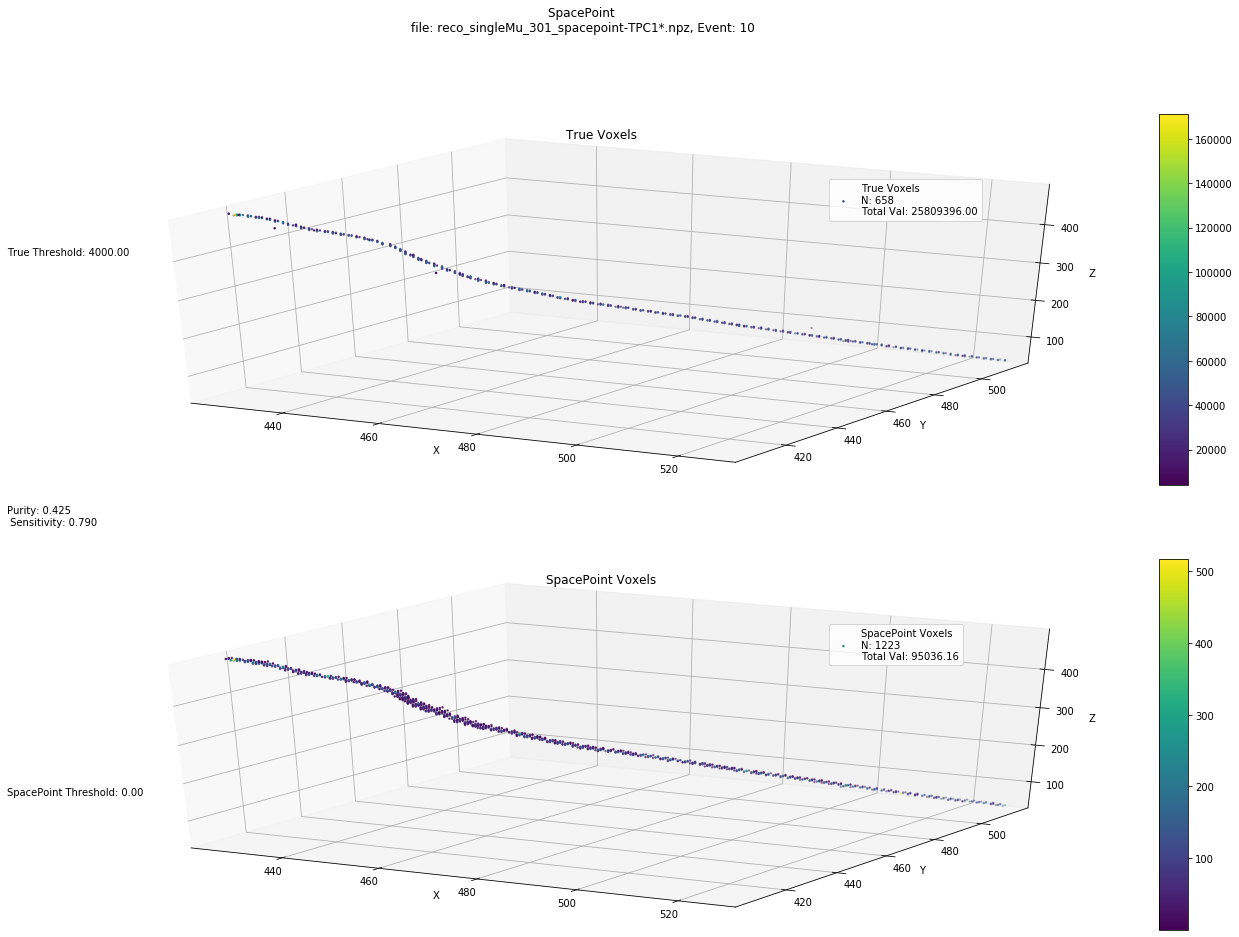

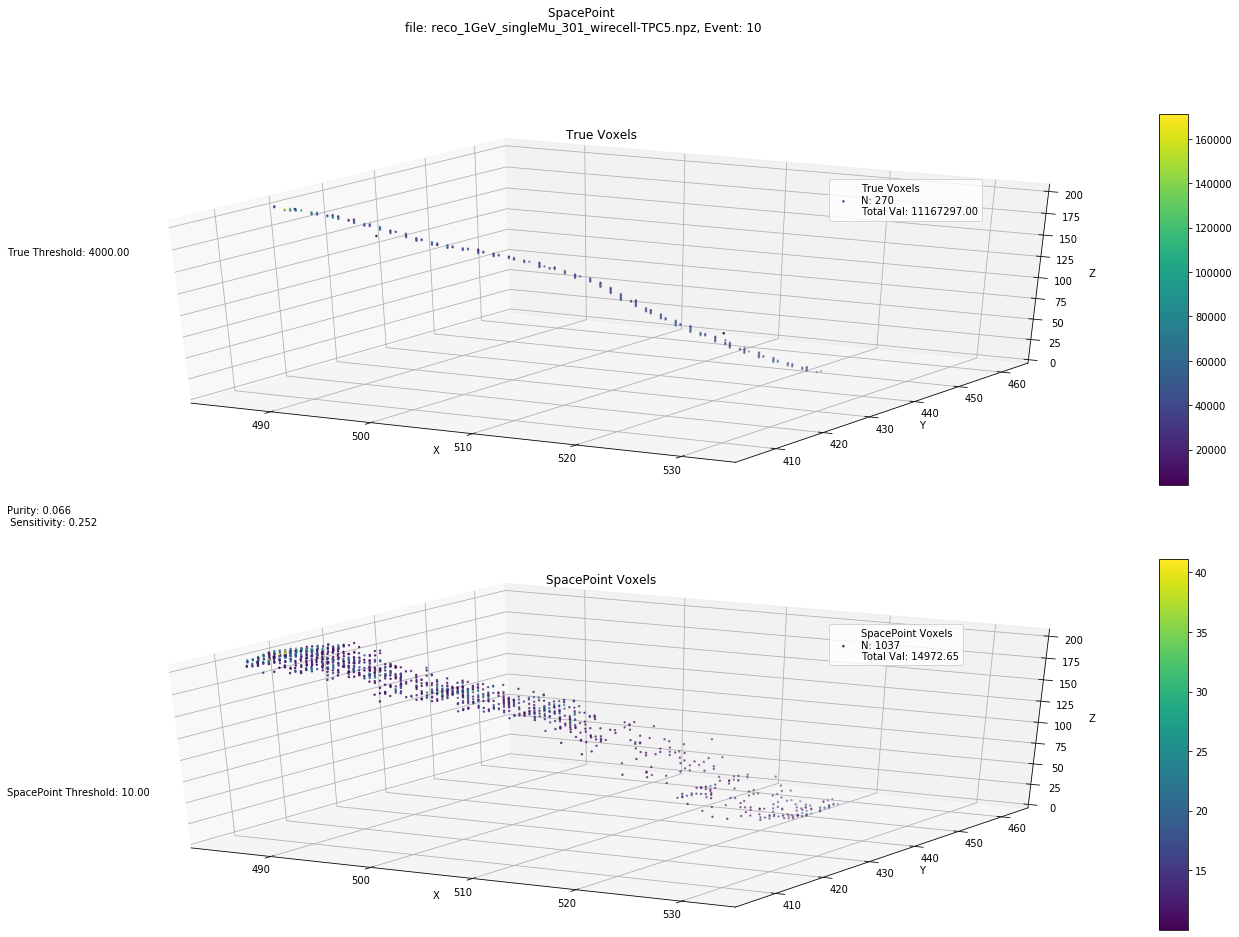

In [4]:
events=[4, 7]
index = 301
event = 10
lims=None
#lims = ((0, 5550), None, None)
"""
yinf.plot_yinf_simple(plt.figure(), None, event, 0.35, 1, 0, lims, 
                      xy_dir=SIM_DIR+"reco_1GeV_MuWire_xy/", 
                      yinf_file=(ML_DIR+"singleE-BeamCosmic-depoElec-tpc1_charge-164-lr0.01/inference/epoch36-batch0-reco_singleMu_%03d_yinf-TPC1.npy"%index,
                                (ML_DIR+"singleE-BeamCosmic-tpc1_ghost3D-164-lr0.01/inference/epoch24-batch0-reco_singleMu_%03d_yinf-TPC1.npy"%index, 0.35)))
"""
yinf.plot_yinf_simple(plt.figure(), None, event, 0., 1, 4000, lims, 
                      xy_dir=SIM_DIR+"reco_1GeV_MuWire_xy/", 
                      yinf_file=(ML_DIR+"singleE-BeamCosmic-depoElec-tpc1_charge-164-lr0.01/inference/epoch36-batch0-reco_singleMu_%03d_yinf-TPC5.npy"%index,
                                (ML_DIR+"singleE-BeamCosmic-tpc1_ghost3D-164-lr0.01/inference/epoch24-batch0-reco_singleMu_%03d_yinf-TPC5.npy"%index, 0.35)))
products.plot_spacepoint(plt.figure(), None,event , (8, 4, 4), 0, 1, 4000, lims, 
                    spacepoint_file=SIM_DIR+"reco_1GeV_Mu_parsed/reco_singleMu_%03d_spacepoint-TPC1*.npz"%index, truth_file=SIM_DIR+"reco_1GeV_Mu_parsed/reco_singleMu_%03d_depoElectron-TPC1256.npz"%index)
products.plot_spacepoint(plt.figure(), None, event , (8, 4, 4), 10, 1, 4000, lims, 
                    spacepoint_file=SIM_DIR+"wirecell_parsed/uniform/reco_1GeV_singleMu_%03d_wirecell-TPC5.npz"%index, truth_file=SIM_DIR+"reco_1GeV_Mu_parsed/reco_singleMu_%03d_depoElectron-TPC5.npz"%index)

In [ ]:
downsample = (8,4,4)
downsample = (1,1,1)
with np.load(SIM_DIR+"reco_1GeV_Mu_parsed/reco_singleMu_%03d_calonosce-TPC1*.npz"%index, allow_pickle=True) as f:
    voxels = []
    names = []
    voxel_planes = [{}, {}, {}]
    QvR = [[], []]
    QvE = [[], []]
    for calo in f["arr_%d"%event]:
        if len(calo) <= 3: continue
        attr, plane, energy = calo[:3]
        print(calo[1], energy)
        pts = np.vstack(calo[3:])
        voxels.append(util.downsample_voxels(downsample, {(pt[0]-12, pt[1], pt[2]): pt[5] for pt in pts}, reduce=True, avg=True)[0])
        names.append(attr+" Plane %d"%plane)
        voxel_planes[plane].update(voxels[-1])
        if plane == 2 and attr=="Track" and pts[np.argmin(pts[:, 5])][2] > 300:
            QvR[1].extend(pts[:, 3])
            QvR[0].extend(pts[:, 5])
            QvE[1].extend(pts[:, 3])
            QvE[0].extend(pts[:, 4])    
    fig = plt.figure()
    util.scatter_voxel(fig, fig.add_subplot(211, projection="3d"), voxel_planes[2])
    util.scatter_voxels(fig, fig.add_subplot(212, projection="3d"), voxels, names)
    
voxel_truth = util.downsample_voxels(downsample, yinf.parse_yinf(event, SIM_DIR+"reco_1GeV_Mu_parsed/reco_singleMu_%03d_depoElectron-TPC15.npz"%index), reduce=True)[0]
util.scatter_voxels_comp(plt.figure(), util.comp_voxels(voxel_truth, voxel_planes[0]))

plt.figure()
plt.plot(*QvR, "--bo", markersize=2)
plt.plot(QvR[0], np.array(QvE[0])*100, "--ro", markersize=2)

bin_means, bin_edges, binnumber = binned_statistic(*QvR, bins=50)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='y', lw=5,
           label='binned statistic of data')
bin_means, bin_edges, binnumber = binned_statistic(QvR[0], np.array(QvE[0])*100, bins=50)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='purple', lw=5,
           label='binned statistic of data')
"""
plt.figure()
plt.scatter(*QvE, s=5)
plt.figure()
plt.hist([[v for k, v in voxel.items()] for voxel in voxel_planes], histtype='step', label=range(3))
plt.legend()
plt.show()
"""

In [ ]:
products.plot_channel(plt.figure(), event, channel_file=SIM_DIR+"reco_1GeV_Mu_parsed/reco_singleMu_%03d_wire-TPC5.npz"%index)
yinf_file = (ML_DIR+"singleE-BeamCosmic-depoElec-tpc1_charge-164-lr0.01/inference/epoch36-batch0-reco_singleMu_%03d_yinf-TPC5.npy"%index,
            (ML_DIR+"singleE-BeamCosmic-tpc1_ghost3D-164-lr0.01/inference/epoch24-batch0-reco_singleMu_%03d_yinf-TPC5.npy"%index, 0.35))
util.plot_voxel_projection(plt.figure(), 
                               util.downsample_voxels(np.reciprocal((8., 4., 4.)), 
                               yinf.parse_yinf((event, SIM_DIR+"reco_1GeV_MuWire_xy/"), yinf_file), reduce=True)[0], 0.5)
with np.load(SIM_DIR+"reco_1GeV_Mu_parsed/reco_singleMu_%03d_calonosce-TPC5.npz"%index, allow_pickle=True) as f:
    voxels = []
    names = []
    voxel_planes = [{}, {}, {}]
    for calo in f["arr_%d"%event]:
        attr, plane, energy = calo[:3]
        if len(calo) <= 3: continue
        pts = np.vstack(calo[3:])
        voxels.append(util.downsample_voxels((1,1,1), {(pt[0]-12, pt[1], pt[2]): pt[3] for pt in pts}, reduce=True)[0])
        names.append(attr+" Plane %d"%plane)
        voxel_planes[plane].update(voxels[-1])
util.plot_voxel_projection(plt.figure(), voxel_planes[2])

### BeamCosmic

In [ ]:
index = 2
event = 3
with np.load(SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_spacepoint-TPC12.npz"%index) as f:
    voxel_spacepoint = {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}
with np.load(SIM_DIR+"wirecell_parsed/uniform/reco_1GeV_BeamCosmic_%03d_wirecell-TPC1.npz"%index) as f:
    voxel_wirecell = {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}
fig, ax = plt.subplots()

util.histo_voxels(fig, ax, [util.filter_voxels_coord(((0, 550), None, None), yinf.parse_yinf(event, "../ml/test/epoch24-batch0-reco_BeamCosmic_%03d_yinf-TPC1.npz"%index))[0], 
                            util.filter_voxels_coord(((0, 550), None, None), yinf.parse_yinf(event, "../ml/test/OLS/epoch24-batch0-reco_BeamCosmic_%03d_yinf-TPC1.npz"%index))[0],
                            util.filter_voxels_coord(((-62.5, 550-62.5), None, None), *util.downsample_voxels((8, 4, 4), voxel_spacepoint, reduce=True))[0],
                            util.filter_voxels_coord(((0, 550), None, None), *util.downsample_voxels((8, 4, 4), voxel_wirecell, reduce=True))[0],],
                  ["Lasso", "OLS", "SpacePointSolver", "Wirecell"], "rgby", bins=30, log_yscale=True)
#ax.set_xlim(-100, 500)

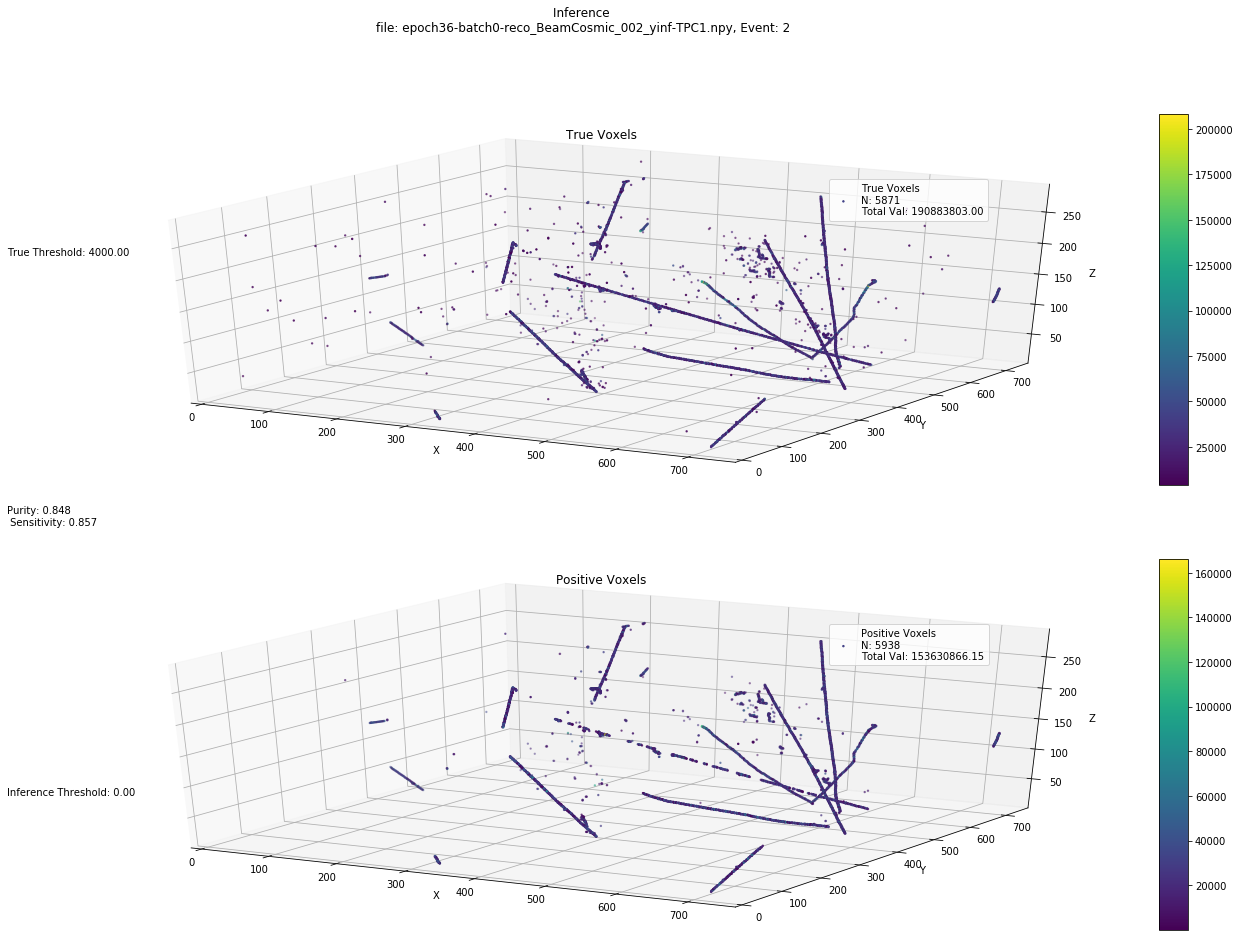

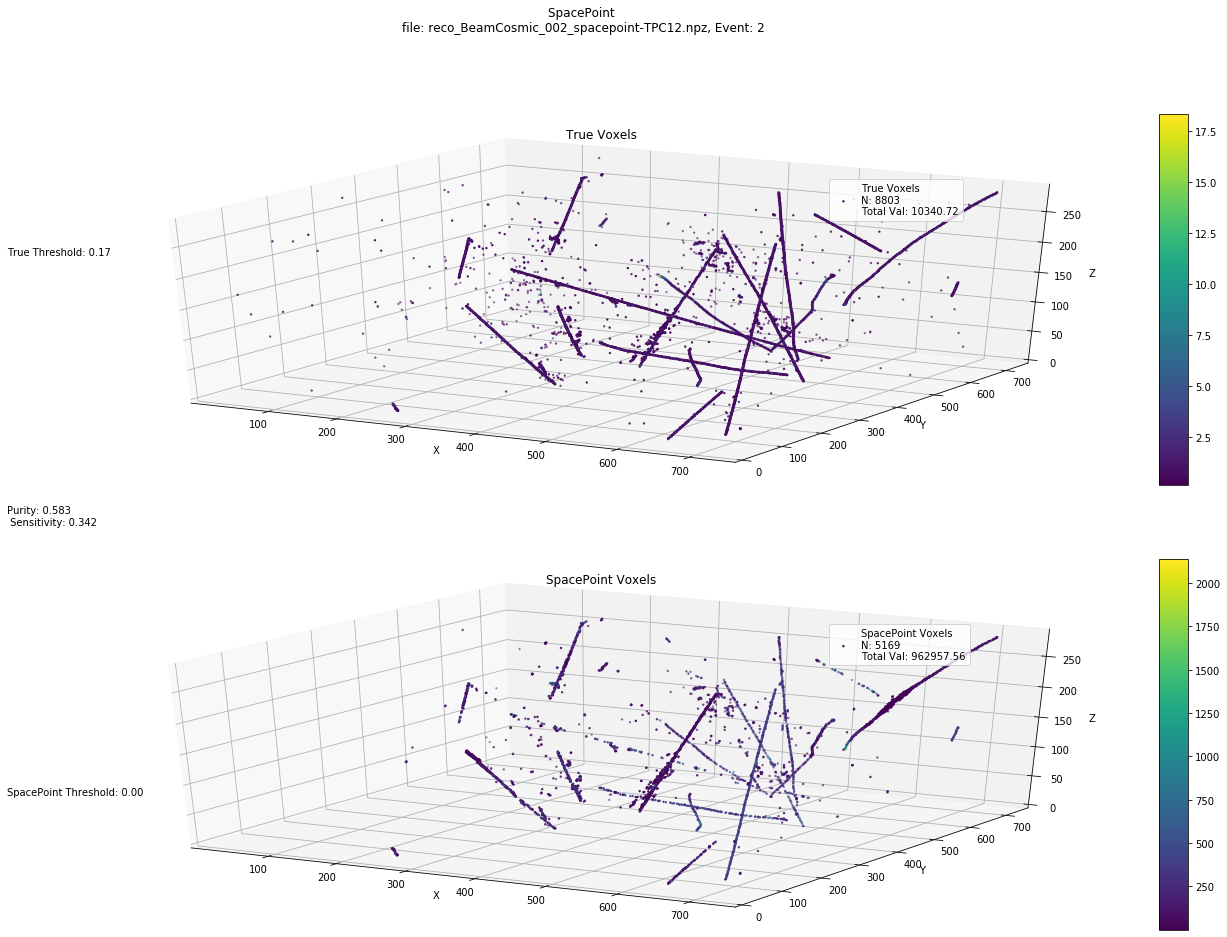

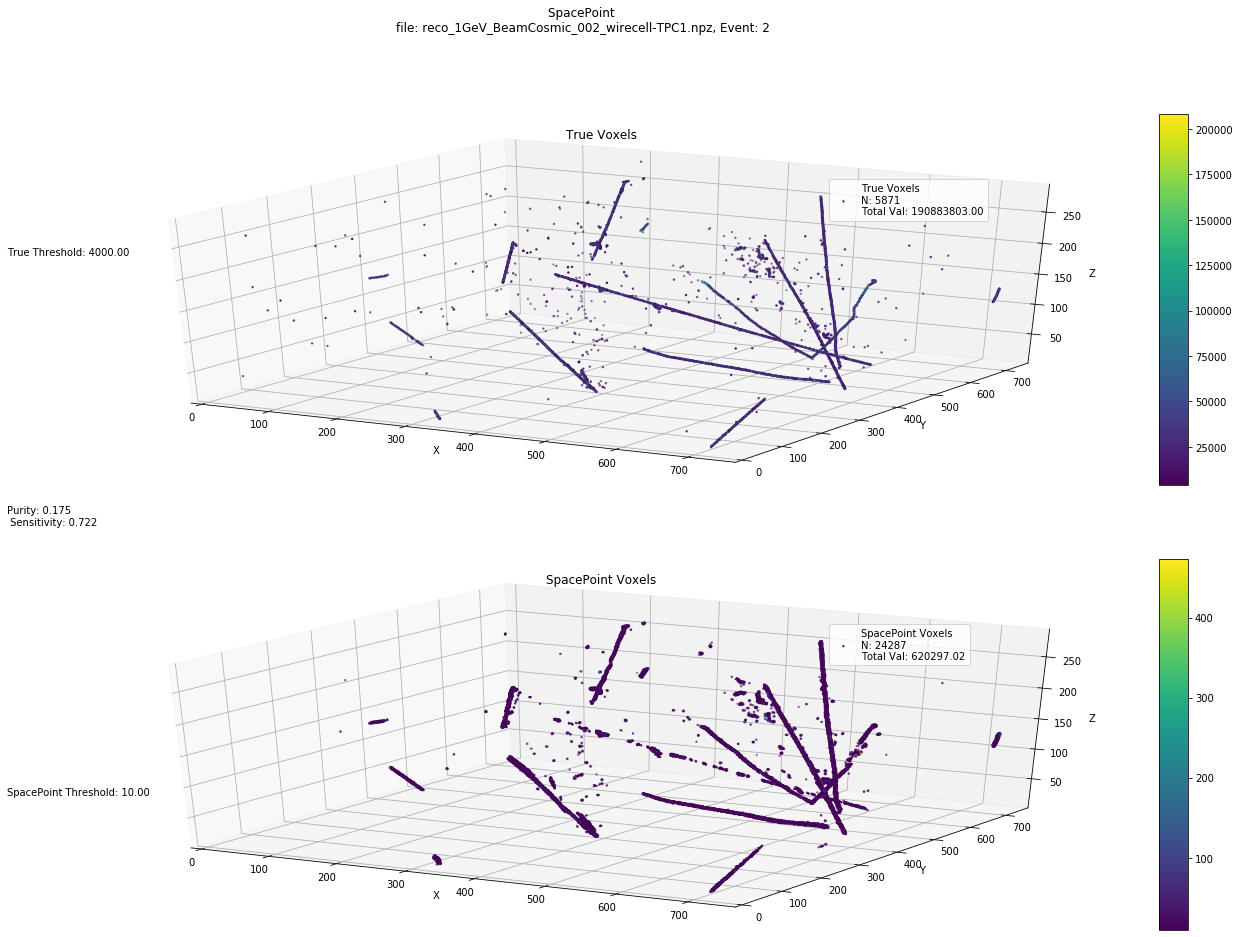

In [5]:
index = 2
event = 2
lims=None
lims = ((0, 750), None, None)
#lims = [[348., 573.], [328., 717.], [169., 239.]]
#lims= [[360., 367.],[619., 748.],[180., 223.]]
yinf_file = (ML_DIR+"singleE-BeamCosmic-depoElec-tpc1_charge-164-lr0.01/inference/epoch36-batch0-reco_BeamCosmic_%03d_yinf-TPC1.npy"%index,
            (ML_DIR+"singleE-BeamCosmic-tpc1_ghost3D-164-lr0.01/inference/epoch24-batch0-reco_BeamCosmic_%03d_yinf-TPC1.npy"%index, 0.35))
yinf.plot_yinf_simple(plt.figure(), None, event, 0., 1, 4000, lims, 
                      xy_dir=SIM_DIR+"reco_1GeV_BeamCosmic-depoElec_xy/", yinf_file=yinf_file)
products.plot_spacepoint(plt.figure(), None,event , (8, 4, 4), 0, 1, .17, lims, 
                    spacepoint_file=SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_spacepoint-TPC12.npz"%index, truth_file=SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_depo-TPC12.npz"%index)
products.plot_spacepoint(plt.figure(), None, event , (8, 4, 4), 10, 1, 4000, lims, 
                    spacepoint_file=SIM_DIR+"wirecell_parsed/uniform/reco_1GeV_BeamCosmic_%03d_wirecell-TPC1.npz"%index, truth_file=SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_depoElectron-TPC1.npz"%index)

In [ ]:
downsample = (8,4,4)
#downsample = (1,1,1)
tpc_lims = np.array((3585//(1.565/2), 5984//2, 2300//2))
with np.load(SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_calonosce-TPC1.npz"%index, allow_pickle=True) as f:
    voxels = []
    names = []
    voxel_planes = [{}, {}, {}]
    QvR = [[], []]
    QvE = [[], []]
    indexes = []
    for i, calo in enumerate(f["arr_%d"%event]):
        if len(calo) <= 3: continue
        attr, plane, energy = calo[:3]
        pts = np.vstack(calo[3:])
        pts[:, 0] -= 12
        in_tpc = np.all((tpc_lims-pts[np.argmin(pts[:, 5])][:3])>100) and np.all(pts[np.argmin(pts[:, 5])][:3]>100)
        if plane != 2: continue
        if len(calo)<10: continue
        #if not (plane == 2 and attr=="Track" and np.min(pts[:, 5]) < 1 and in_tpc and len(calo)>30): continue
        #if attr!="Track": continue
        #if attr!="Shower": continue
        #if i != 60: continue
        #print(calo[1], energy)
        voxels.append(util.downsample_voxels(downsample, {(pt[0], pt[1], pt[2]): pt[3] for pt in pts}, reduce=True, avg=True)[0])
        names.append(attr+" Plane %d, id %d"%(plane, i))
        voxel_planes[plane].update(voxels[-1])
        if False or (plane == 2 and attr=="Track" and np.min(pts[:, 5]) < 1 and in_tpc and len(calo)>30):
            QvR[1].extend(pts[:, 3])
            QvR[0].extend(pts[:, 5])
            QvE[1].extend(pts[:, 3])
            QvE[0].extend(pts[:, 4])    
            print(i)
            print(util.get_voxels_lims(voxels[-1]))
            indexes.append(i)
    fig = plt.figure()
    util.scatter_voxel(fig, fig.add_subplot(211, projection="3d"), voxel_planes[2])
    util.scatter_voxels(fig, fig.add_subplot(212, projection="3d"), voxels, names)

voxel_truth = util.downsample_voxels(downsample, yinf.parse_yinf(event, SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_depoElectron-TPC1.npz"%index), reduce=True)[0]
util.scatter_voxels_comp(plt.figure(), util.comp_voxels(voxel_truth, voxel_planes[2]))

plt.figure()
plt.plot(*QvR, "bo", markersize=2)
plt.plot(QvR[0], np.array(QvE[0])*100, "ro", markersize=2)
try:
    bin_means, bin_edges, binnumber = binned_statistic(QvR[0], np.array(QvE[0])*100, bins=100)
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='purple', lw=5,
               label='binned statistic of data')
    bin_means, bin_edges, binnumber = binned_statistic(*QvR, bins=100)
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='y', lw=5,
               label='binned statistic of data')
except Exception:
    pass
"""
plt.figure()
plt.scatter(*QvE, s=5)
plt.figure()
plt.hist([[v for k, v in voxel.items()] for voxel in voxel_planes], histtype='step', label=range(3))
plt.legend()
plt.show()
"""

In [ ]:
downsample = (8,4,4)
#downsample = (1,1,1)
tpc_lims = np.array((3585//(1.565/2), 5984//2, 2300//2))
with np.load(SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_calo-TPC1.npz"%index, allow_pickle=True) as f:
    voxels = []
    names = []
    voxel_planes = [{}, {}, {}]
    QvR = [[], []]
    QvE = [[], []]
    for i, calo in enumerate(f["arr_%d"%event]):
        #if i not in indexes: continue
        if len(calo) <= 3: continue
        attr, plane, energy = calo[:3]
        pts = np.vstack(calo[3:])
        pts[:, 0] -= 12
        in_tpc = np.all((tpc_lims-pts[np.argmin(pts[:, 5])][:3])>50) and np.all(pts[np.argmin(pts[:, 5])][:3]>50)
        #if plane != 2: continue
        if len(calo)<10: continue
        #if not (plane == 2 and attr=="Track" and np.min(pts[:, 5]) < 1 and in_tpc and len(calo)>30): continue
        #if attr!="Track": continue
        #if attr!="Shower": continue
        #if i != 6: continue
        #print(calo[1], energy)
        voxels.append(util.downsample_voxels(downsample, {(pt[0], pt[1], pt[2]): pt[3] for pt in pts}, reduce=True, avg=True)[0])
        names.append(attr+" Plane %d, id %d"%(plane, i))
        voxel_planes[plane].update(voxels[-1])
        if plane == 2 and attr=="Track" and np.min(pts[:, 5]) < 1 and in_tpc and len(calo)>30:
            QvR[1].extend(pts[:, 3])
            QvR[0].extend(pts[:, 5])
            QvE[1].extend(pts[:, 3])
            QvE[0].extend(pts[:, 4])    
            print(i)
    fig = plt.figure()
    util.scatter_voxel(fig, fig.add_subplot(211, projection="3d"), voxel_planes[2])
    util.scatter_voxels(fig, fig.add_subplot(212, projection="3d"), voxels, names)

voxel_truth = util.downsample_voxels(downsample, yinf.parse_yinf(event, SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_depoElectron-TPC1.npz"%index), reduce=True)[0]
util.scatter_voxels_comp(plt.figure(), util.comp_voxels(voxel_truth, voxel_planes[2]))

plt.figure()
try:
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='y', lw=5,
               label='binned statistic of data')
    bin_means2, bin_edges2, binnumber2 = binned_statistic(*QvR, bins=bin_edges)
    plt.hlines(bin_means2, bin_edges2[:-1], bin_edges2[1:], colors='purple', lw=5,
               label='binned statistic of data')
except Exception:
    pass


In [ ]:
products.plot_channel(plt.figure(), event, channel_file=SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_wire-TPC1.npz"%index)
yinf_file = (ML_DIR+"singleE-BeamCosmic-depoElec-tpc1_charge-164-lr0.01/inference/epoch36-batch0-reco_BeamCosmic_%03d_yinf-TPC1.npy"%index,
            (ML_DIR+"singleE-BeamCosmic-tpc1_ghost3D-164-lr0.01/inference/epoch24-batch0-reco_BeamCosmic_%03d_yinf-TPC1.npy"%index, 0.35))
util.plot_voxel_projection(plt.figure(), 
                               util.downsample_voxels(np.reciprocal((8., 4., 4.)), 
                               yinf.parse_yinf((event, SIM_DIR+"reco_1GeV_BeamCosmic_xy/"), yinf_file), reduce=True)[0], 0.5)

with np.load(SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_calonosce-TPC1.npz"%index, allow_pickle=True) as f:
    voxels = []
    names = []
    voxel_planes = [{}, {}, {}]
    for calo in f["arr_%d"%event]:
        attr, plane, energy = calo[:3]
        if len(calo) <= 3: continue
        pts = np.vstack(calo[3:])
        voxels.append(util.downsample_voxels((1,1,1), {(pt[0]-12, pt[1], pt[2]): pt[3] for pt in pts}, reduce=True)[0])
        names.append(attr+" Plane %d"%plane)
        voxel_planes[plane].update(voxels[-1])
util.plot_voxel_projection(plt.figure(), voxel_planes[2])

In [ ]:
print(sorted(yinf.parse_yinf(event, "../ml/test/epoch24-batch0-reco_BeamCosmic_%03d_yinf-TPC1.npz"%index).values())[200])

In [ ]:
def comp_voxels_val(voxel_A, voxel_B, name_A="A", name_B="B"):
    voxel_A_B, voxel_int_A, voxel_int_B, voxel_B_A = util.comp_voxels(voxel_A, voxel_B)
    if False:
        inc = 150
        n_segs = 5
        Rs = []
        for i in range(n_segs):
            int_A, int_B = util.filter_voxels_coord(((i*inc, (i+1)*inc), None, None), voxel_int_A, voxel_int_B)
            vals_intersect = np.array((list(int_A.values()), list(int_B.values())))
            slope, intercept, r, p, se = linregress(*vals_intersect)
            Rs.append(r)
        plt.figure()
        plt.plot(Rs)
    #vals_intersect = np.array([[voxel_int_A[c], voxel_int_B[c]] for c in voxel_int_A]).T
    vals_intersect = np.array((list(voxel_int_A.values()), list(voxel_int_B.values())))
    #vals_intersect = np.array((list(voxel_int_B.values()), list(voxel_int_A.values())))
    slope, intercept, r, p, se = linregress(*vals_intersect)
    fig, axes = plt.subplots(3)
    ax, ax2, ax3 = axes
    dens = gaussian_kde(vals_intersect)(vals_intersect)
    ax.scatter(*vals_intersect, s=1, c=dens)
    ax.plot(vals_intersect[0], vals_intersect[0]*slope+intercept)
    ax.text(0.4, 0.7, "Slope: %.3f, Intercept: %.3f \n r: %.3f"%(slope, intercept, r), transform=ax.transAxes)
    ax.set_xlabel(name_A)
    ax.set_ylabel(name_B)
    ax.set_title("%s vs %s"%(name_A, name_B)) 
    util.histo_voxels_comp(fig, ax2, (voxel_A_B, voxel_int_A, {}, {c: None for c in voxel_B_A}), name_A, name_B, 20)
    util.histo_voxels_comp(fig, ax3, ({c: None for c in voxel_A_B}, voxel_int_B, {}, voxel_B_A), name_A, name_B, 20)
    #fig.suptitle("Energy Scatter \nInference file: %s, Event: %d"%(yinf_file[yinf_file.rfind('/')+1:], event))
    
def comp_voxel_chan(voxel, chan_vals, voxel_name="voxel", chan_names=("u", "v", "x")):
    voxel = util.downsample_voxels((1, -1, -1), voxel)[0]
    fig, axes = plt.subplots(2)
    ax, ax2 = axes
    chan_sums = []
    for chan, name in zip(chan_vals, chan_names):
        chan_sum = np.sum(chan, axis=1)
        residual, missing = {}, {}
        for t, c in enumerate(chan_sum):
            if c <= 0: continue
            if (t, ) in voxel:
                residual[t] = c - voxel[(t, )]
            else:
                missing[t] = c
        ax.scatter(residual.keys(), residual.values(), s=1, label=name \
                    + " difference\nN: %d \n Val: %d"%(len(residual), sum(residual.values())))
        ax2.scatter(missing.keys(), missing.values(), s=1, label=name \
                    + " missing\nN: %d \n Val: %d"%(len(missing), sum(missing.values())))
        chan_sums.append(sum(chan_sum))
    ax.text(0.3, 0.7, "Total Chan Vals: \n"+"\n".join(["%s: %d"%(name, s) for name, s in zip(chan_names, chan_sums)]), transform=ax.transAxes)
    ax.text(0.5, 0.8, "Total Voxel Val: %d"%sum(voxel.values()), transform=ax.transAxes)
    ax.legend()
    ax2.legend()
    fig.suptitle("%s Voxel vs. Wire values over time slices" % voxel_name)
    
def comp_voxels_chan(voxels, chan_vals, voxel_names=("voxel",), chan_names=("u", "v", "x")):
    voxels = util.downsample_voxels((1, -1, -1), *voxels)
    fig, axes = plt.subplots(2)
    ax, ax2 = axes
    for voxel, name in zip(voxels, voxel_names):
        #ax.scatter(voxel.keys(), voxel.values(), label=name, s=1)
        items = sorted(voxel.items(), key=lambda k: k[0])
        ax.plot([x for x, y in items], [y for x, y in items], label=name, linestyle="dashed")
    for chan, name in zip(chan_vals, chan_names):
        #ax2.scatter(np.arange(len(chan)), np.sum(chan, axis=1), label=name, s=1)
        ax2.plot(np.arange(len(chan)), np.sum(chan, axis=1), label=name, linestyle="dashed")
    ax.legend()
    ax2.legend()


In [ ]:
index = 1
event = 1
downsample = (8, 4, 4)
#downsample = (1, 1, 1)
with np.load(SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_spacepoint-TPC12.npz"%index) as f:
    voxel_spacepoint = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}, reduce=True)[0] 
voxel_spacepoint_shifted = {(c[0]+(244*2)//downsample[0], c[1], c[2]): v for c, v in voxel_spacepoint.items()}
with np.load(SIM_DIR+"wirecell_parsed/uniform/reco_1GeV_BeamCosmic_%03d_wirecell-TPC1.npz"%index) as f:
    voxel_wirecell = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}, reduce=True)[0] 
    
voxel_yinf_solve = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event, "../ml/test/epoch24-batch0-reco_BeamCosmic_%03d_yinf-TPC1.npz"%index), reduce=True)[0]
yinf_file = ML_DIR+"singleE-BeamCosmic-tpc1_charge-164-lr0.01/inference/epoch26-batch0-reco_BeamCosmic_%03d_yinf-TPC1.npy"%index
_, _, event_info = products.parse_xy(event, 1, yinf.get_xy_file(SIM_DIR+"reco_1GeV_BeamCosmic_xy/", yinf_file))
voxel_yinf = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event_info, yinf_file), reduce=True)[0] 
voxel_yinf = util.filter_voxels_coords(voxel_yinf_solve.keys(), voxel_yinf)[0]
voxel_true = util.downsample_voxels(downsample, yinf.parse_yinf(event, "../tiling/test/Depo/reco_BeamCosmic_%03d_charge-TPC1.npz"%index), reduce=True)[0]
voxel_true_downsample = yinf.parse_yinf(event, "../tiling/test/Depo_downsample8-4-4/reco_BeamCosmic_%03d_charge-TPC1.npz"%index)

with np.load(SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_depo-TPC12.npz"%index) as f:
    voxel_truth_sp = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}, reduce=True)[0] 
#with np.load(SIM_DIR+"reco_1GeV_BeamCosmic_parsed-test/reco_BeamCosmic_%03d_depo-TPC1.npz"%index) as f:
    #voxel_truth_charge = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}, reduce=True)[0] 
with np.load(SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_depo-TPC1.npz"%index) as f:
    voxel_truth_energy = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}, reduce=True)[0] 
    
with np.load(SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_wire-TPC1.npz"%index) as f: 
    from geom.pdsp import get_APA_wireplane_maps
    chan_vals = np.sum(np.split(f["arr_%d"%event], np.arange(downsample[0], 6000, downsample[0])), axis=1)
    umap, vmap, xmap, = get_APA_wireplane_maps(1)
    chan_vals = (chan_vals[:, umap], chan_vals[:, vmap], chan_vals[:, xmap])

#comp_voxels_val(voxel_truth_charge, voxel_wirecell, "Truth [e-]", "Wirecell")
comp_voxels_val(voxel_truth_energy, voxel_wirecell, "Truth [MeV]", "Wirecell")
comp_voxels_val(voxel_truth_sp, voxel_spacepoint, "Truth [MeV]", "SpacePointSolver")
comp_voxels_val(util.downsample_voxels((1, 1, 1), voxel_truth_energy, reduce=True)[0], voxel_yinf, "Truth [MeV]", "Network")
comp_voxels_val(voxel_truth_energy, voxel_true, "Truth [MeV]", "True")
comp_voxels_val(voxel_truth_energy, voxel_true_downsample, "Truth [MeV]", "True")
#comp_voxels_val(voxel_truth_energy, voxel_truth_charge, "energy", "charge")

"""
comp_voxel_chan(voxel_yinf, chan_vals, "Network")
comp_voxel_chan(voxel_wirecell, chan_vals, "Wirecell")
comp_voxel_chan(voxel_spacepoint_shifted, chan_vals, "Spacepoint")
comp_voxel_chan(voxel_true, chan_vals, "True")
comp_voxel_chan(voxel_true_downsample, chan_vals, "True Downsampled")
comp_voxels_chan((voxel_yinf, voxel_wirecell, voxel_spacepoint_shifted), chan_vals, ("Network", "Wirecell", "Spacepoint"))
comp_voxels_chan((voxel_true, voxel_true_downsample), chan_vals, ("True", "True Downsampled"))
"""

In [ ]:
index = 953
event = 7
downsample = (8, 4, 4)
#downsample = (1, 1, 1)


voxel_spacepoint = util.downsample_voxels(downsample,  yinf.parse_yinf(event, SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_spacepoint-TPC12.npz"%index), reduce=True)[0] 
voxel_spacepoint_shifted = {(c[0]+(244*2)//downsample[0], c[1], c[2]): v for c, v in voxel_spacepoint.items()}
voxel_wirecell = util.downsample_voxels(downsample, yinf.parse_yinf(event, SIM_DIR+"wirecell_parsed/uniform/reco_1GeV_singleElectron_%03d_wirecell-TPC1.npz"%index), reduce=True)[0] 

voxel_yinf = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event, "../ml/test/epoch24-batch0-reco_singleElectron_%03d_yinf-TPC1.npz"%index), reduce=True)[0] 
voxel_true = util.downsample_voxels(downsample, yinf.parse_yinf(event, "../tiling/test/Depo/reco_singleElectron_%03d_charge-TPC1.npz"%index), reduce=True)[0]
voxel_true_downsample = util.downsample_voxels(np.divide(downsample, (1,4,4)), yinf.parse_yinf(event, "../tiling/test/Depo_1-4-4/reco_singleElectron_%03d_charge-TPC1.npz"%index), reduce=True)[0]
voxel_true_downsample = util.downsample_voxels(downsample, yinf.parse_yinf(event, "../tiling/test/Wirecell/reco_singleElectron_%03d_charge-TPC1.npz"%index), reduce=True)[0]

with np.load(SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_energy-TPC12.npz"%index) as f:
    voxel_truth_sp = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3]/3 for pt in f["arr_%d"%event]}, reduce=True)[0] 
with np.load(SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_energy-TPC1.npz"%index) as f:
    voxel_truth_energy = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3]/3 for pt in f["arr_%d"%event]}, reduce=True)[0] 
    
with np.load(SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_wire-TPC1.npz"%index) as f: 
    from geom.pdsp import get_APA_wireplane_maps
    chan_vals = np.sum(np.split(f["arr_%d"%event], np.arange(downsample[0], 6000, downsample[0])), axis=1)
    umap, vmap, xmap, = get_APA_wireplane_maps(1)
    chan_vals = (chan_vals[:, umap], chan_vals[:, vmap], chan_vals[:, xmap])

#comp_voxels_val(voxel_truth_charge, voxel_wirecell, "Truth [e-]", "Wirecell")

comp_voxels_val(voxel_truth_energy, voxel_wirecell, "Truth [MeV]", "Wirecell")
comp_voxels_val(voxel_truth_sp, voxel_spacepoint, "Truth [MeV]", "SpacePointSolver")
comp_voxels_val(util.downsample_voxels((1, 1, 1), voxel_truth_energy, reduce=True)[0], voxel_yinf, "Truth [MeV]", "Network")
comp_voxels_val(voxel_truth_energy, voxel_true, "Truth [MeV]", "True")
comp_voxels_val(voxel_truth_energy, voxel_true_downsample, "Truth [MeV]", "True Downsampled")
#comp_voxels_val(voxel_truth_charge, voxel_truth_energy, "charge", "energy")
comp_voxels_val(voxel_wirecell, voxel_yinf, "Wirecell", "Network")
comp_voxels_val(voxel_spacepoint_shifted, voxel_yinf, "Spacepoint", "Network")
"""
comp_voxel_chan(voxel_yinf, chan_vals, "Network")
comp_voxel_chan(voxel_wirecell, chan_vals, "Wirecell")
comp_voxel_chan(voxel_spacepoint_shifted, chan_vals, "Spacepoint")
comp_voxel_chan(voxel_true, chan_vals, "True")
comp_voxel_chan(voxel_true_downsample, chan_vals, "True Downsampled")
comp_voxels_chan((voxel_yinf, voxel_wirecell, voxel_spacepoint_shifted), chan_vals, ("Network", "Wirecell", "Spacepoint"))
#comp_voxels_chan((voxel_wirecell, voxel_spacepoint_shifted, voxel_true), chan_vals, ("Wirecell", "Spacepoint", "True"))
comp_voxels_chan((voxel_true, voxel_true_downsample), chan_vals, ("True", "True Downsampled"))
"""

In [ ]:
index = 1
downsample = (8, 4, 4)
segmented, inc, n_segs  = False, 150, 5
gen_val_comp = lambda: [[[] for _ in range(n_segs)] for _ in range(4)] if segmented else [[] for _ in range(4)]
val_comp_sp, val_comp_wc, val_comp_inf, val_comp_true = gen_val_comp(), gen_val_comp(), gen_val_comp(), gen_val_comp()
for event in range(5):
    with np.load(SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_spacepoint-TPC12.npz"%index) as f:
        voxel_spacepoint = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}, reduce=True)[0]
    with np.load(SIM_DIR+"wirecell_parsed/uniform/reco_1GeV_BeamCosmic_%03d_wirecell-TPC1.npz"%index) as f:
        voxel_wirecell = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}, reduce=True)[0] 
    voxel_yinf_solve = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event, "../ml/test/epoch24-batch0-reco_BeamCosmic_%03d_yinf-TPC1.npz"%index), reduce=True)[0]
    yinf_file = ML_DIR+"singleE-BeamCosmic-depoElec-tpc1_charge-164-lr0.01/inference/epoch32-batch0-reco_BeamCosmic_%03d_yinf-TPC1.npy"%index
    _, _, event_info = products.parse_xy(event, 1, yinf.get_xy_file(SIM_DIR+"reco_1GeV_BeamCosmic_xy/", yinf_file))
    #voxel_inf = util.filter_voxels_coords(voxel_yinf_solve.keys(), *util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event_info, yinf_file), reduce=True))[0] 
    voxel_inf = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event_info, yinf_file), reduce=True)[0] 
    voxel_true = util.downsample_voxels(downsample, yinf.parse_yinf(event, "../tiling/test/Depo/reco_BeamCosmic_%03d_charge-TPC1.npz"%index), reduce=True)[0]
    #voxel_true = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event, "../tiling/test/Depo_downsample8-4-4/reco_BeamCosmic_%03d_charge-TPC1.npz"%index), reduce=True)[0]
    
    with np.load(SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_depo-TPC12.npz"%index) as f:
        voxel_truth_sp = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}, reduce=True)[0] 
    with np.load(SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_depo-TPC1.npz"%index) as f:
        voxel_truth_energy = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}, reduce=True)[0]
    with np.load(SIM_DIR+"reco_1GeV_BeamCosmic_parsed/reco_BeamCosmic_%03d_depoElectron-TPC1.npz"%index) as f:
        voxel_truth_charge = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}, reduce=True)[0] 
    #voxel_truth_energy = voxel_truth_charge
    
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_sp, voxel_spacepoint)):
        if segmented:
            for x_i in range(n_segs):
                val_comp_sp[i][x_i].extend(util.filter_voxels_coord(((x_i*inc, (x_i+1)*inc), None, None), voxel)[0].values())
        else:
            val_comp_sp[i].extend(voxel.values())
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_energy, voxel_wirecell)):
        val_comp_wc[i].extend(voxel.values())
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_charge, voxel_inf)):
        if segmented:
            for x_i in range(n_segs):
                val_comp_inf[i][x_i].extend(util.filter_voxels_coord(((x_i*inc, (x_i+1)*inc), None, None), voxel)[0].values())
        else:
            val_comp_inf[i].extend(voxel.values())
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_energy, voxel_true)):
        if segmented:
            for x_i in range(n_segs):
                val_comp_true[i][x_i].extend(util.filter_voxels_coord(((x_i*inc, (x_i+1)*inc), None, None), voxel)[0].values())
        else:
            val_comp_true[i].extend(voxel.values())
    """
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_energy, voxel_truth_charge)):
        val_comp_true[i].extend(voxel.values())
    """
        
def comp_val(val_comp, name_A="A", name_B="B", lim_A=1e10, lim_B =1e10):
    if segmented:
        Rs = []
        for x_i in range(n_segs):
            vals_intersect = np.array([val_comp[2][x_i], val_comp[1][x_i]])
            print(vals_intersect.shape)
            slope, intercept, r, p, se = linregress(*vals_intersect)
            Rs.append(r)
        plt.figure()
        plt.plot(Rs)
        return
    fig, axes = plt.subplots(3)
    ax, ax2, ax3 = axes
    voxel_A_B = {(i, ) : v for i, v in enumerate([v for v in val_comp[0] if v < lim_A])}
    voxel_int_A = {(i, ) : v for i, v in enumerate([v for v in val_comp[1] if v < lim_A])}
    voxel_int_B = {(i, ) : v for i, v in enumerate([v for v in val_comp[2] if v < lim_B])}
    voxel_B_A = {(i, ) : v for i, v in enumerate([v for v in val_comp[3] if v < lim_B])}
    vals_intersect = np.array([val_comp[2], val_comp[1]])
    #vals_intersect = np.array([val_comp[1], val_comp[2]])
    dens = gaussian_kde(vals_intersect)(vals_intersect)
    ax.scatter(*vals_intersect, s=1, c=dens)
    slope, intercept, r, p, se = linregress(*vals_intersect)
    ax.plot(vals_intersect[0], vals_intersect[0]*slope+intercept, linestyle=":")
    ax.text(0.4, 0.7, "Slope: %.3f, Intercept: %.3f \n r: %.3f"%(slope, intercept, r), transform=ax.transAxes)
    ax.set_xlabel(name_B)
    ax.set_ylabel(name_A)
    ax.set_title("%s vs %s"%(name_A, name_B)) 
    util.histo_voxels_comp(fig, ax2, (voxel_A_B, voxel_int_A, {}, {c: None for c in voxel_B_A}), name_A, name_B, 20)
    util.histo_voxels_comp(fig, ax3, ({c: None for c in voxel_A_B}, voxel_int_B, {}, voxel_B_A), name_A, name_B, 20)
    
#comp_val(val_comp_sp, "Truth", "SpacePointSolver", 10, 1500)
#comp_val(val_comp_wc, "Truth", "Wirecell", 10, 100)
#comp_val(val_comp_inf, "Truth", "Network", 10, 500)

comp_val(val_comp_sp, "Truth", "SpacePointSolver",)
#comp_val(val_comp_wc, "Truth", "Wirecell", )
comp_val(val_comp_inf, "Truth", "Network",)
comp_val(val_comp_true, "Truth", "True",)
#comp_val(val_comp_true, "Energy", "Charge")

In [ ]:
index = 953
downsample = (8, 4, 4)
val_comp_sp, val_comp_wc, val_comp_inf, val_comp_true = [[] for _ in range(4)], [[] for _ in range(4)], [[] for _ in range(4)], [[] for _ in range(4)]
for event in range(30):
    voxel_spacepoint = util.downsample_voxels(downsample,  yinf.parse_yinf(event, SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_spacepoint-TPC12.npz"%index), reduce=True)[0] 
    voxel_spacepoint_shifted = {(c[0]+(244*2)//downsample[0], c[1], c[2]): v for c, v in voxel_spacepoint.items()}
    voxel_wirecell = util.downsample_voxels(downsample, yinf.parse_yinf(event, SIM_DIR+"wirecell_parsed/uniform/reco_1GeV_singleElectron_%03d_wirecell-TPC1.npz"%index), reduce=True)[0] 
    #voxel_wirecell = util.downsample_voxels(downsample, yinf.parse_yinf(event, "../tiling/test/Wirecell/reco_singleElectron_%03d_charge-TPC1.npz"%index), reduce=True)[0]
    voxel_yinf_solve = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event, "../ml/test/epoch24-batch0-reco_singleElectron_%03d_yinf-TPC1.npz"%index), reduce=True)[0] 
    #yinf_file = ML_DIR+"singleE-BeamCosmic-depoElec-tpc1_charge-164-lr0.01/inference/epoch36-batch0-reco_singleElectron_%03d_yinf-TPC1.npy"%index
    yinf_file = ML_DIR+"singleE-depoElec_charge-164-lr0.01/inference/epoch66-batch0-reco_singleElectron_%03d_yinf-TPC1.npy"%index
    yinf_file = (ML_DIR+"singleE-BeamCosmic-depoElec-tpc1_charge-164-lr0.01/inference/epoch36-batch0-reco_singleElectron_%03d_yinf-TPC1.npy"%index,
        (ML_DIR+"singleE-BeamCosmic-tpc1_ghost3D-164-lr0.01/inference/epoch24-batch0-reco_singleElectron_%03d_yinf-TPC1.npy"%index, 0.35))
    #yinf_file = ML_DIR+"singleE-depoElec_charge-164-MSE555-lr0.01/inference/epoch33-batch0-reco_singleElectron_%03d_yinf-TPC1.npy"%index
    #_, _, event_info = products.parse_xy(event, 1, yinf.get_xy_file(SIM_DIR+"reco_1GeV_ElectronWire_xy-v3_3/", yinf_file))
    _, voxel_active, event_info = products.parse_xy(event, 1, yinf.get_xy_file(SIM_DIR+"reco_1GeV_Electron-depoElec_xy/", yinf_file))
    #voxel_yinf = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event_info, yinf_file), reduce=True)[0] 
    #voxel_yinf = util.filter_voxels_coords(voxel_yinf_solve.keys(), *util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event_info, yinf_file), reduce=True))[0] 
    voxel_yinf = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event_info, yinf_file), reduce=True)[0]
    
    """
    yinf_file = ML_DIR+"singleE-BeamCosmic-tpc1_ghost3D-164-lr0.01/inference/epoch24-batch0-reco_singleElectron_%03d_yinf-TPC1.npy"%index
    _, _, event_info = products.parse_xy(event, 1, yinf.get_xy_file(SIM_DIR+"reco_1GeV_ElectronWire_xy-v3_3/", yinf_file))
    voxel_yinf2 = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event_info, yinf_file), reduce=True)[0] 
    """
    #voxel_yinf=voxel_yinf_solve
    voxel_true = util.downsample_voxels(downsample, yinf.parse_yinf(event, "../tiling/test/Depo/reco_singleElectron_%03d_charge-TPC1.npz"%index), reduce=True)[0]
    voxel_true_downsample = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event, "../tiling/test/Depo_downsample8-4-4/reco_singleElectron_%03d_charge-TPC1.npz"%index), reduce=True)[0]
  
    with np.load(SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_energy-TPC12.npz"%index) as f:
        voxel_truth_sp = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3]/3 for pt in f["arr_%d"%event]}, reduce=True)[0] 
    with np.load(SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_energy-TPC1.npz"%index) as f:
        voxel_truth_energy = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3]/3 for pt in f["arr_%d"%event]}, reduce=True)[0] 
    with np.load(SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_depoElectron-TPC1.npz"%index) as f:
        voxel_truth_charge = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}, reduce=True)[0] 
        #voxel_truth_charge = util.filter_voxels_coords(voxel_active.keys(), voxel_truth_charge)[0]
    voxel_truth_energy = voxel_truth_charge
    
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_sp, voxel_spacepoint)):
        val_comp_sp[i].extend(voxel.values())
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_energy, voxel_wirecell)):
        val_comp_wc[i].extend(voxel.values())
    """
    for i, voxel in enumerate(util.comp_voxels(voxel_yinf_solve, voxel_spacepoint_shifted)):
        val_comp_sp[i].extend(voxel.values())
    for i, voxel in enumerate(util.comp_voxels(voxel_yinf_solve, voxel_wirecell)):
        val_comp_wc[i].extend(voxel.values())
    """
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_charge, voxel_yinf)):
        val_comp_inf[i].extend(voxel.values())
    """
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_energy, voxel_true)):
        val_comp_true[i].extend(voxel.values())
    """
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_charge, voxel_truth_energy)):
        val_comp_true[i].extend(voxel.values())
        
        
def comp_val(val_comp, name_A="A", name_B="B", lim_A=1e10, lim_B =1e10):
    fig, axes = plt.subplots(3)
    ax, ax2, ax3 = axes
    voxel_A_B = {(i, ) : v for i, v in enumerate([v for v in val_comp[0] if v < lim_A])}
    voxel_int_A = {(i, ) : v for i, v in enumerate([v for v in val_comp[1] if v < lim_A])}
    voxel_int_B = {(i, ) : v for i, v in enumerate([v for v in val_comp[2] if v < lim_B])}
    voxel_B_A = {(i, ) : v for i, v in enumerate([v for v in val_comp[3] if v < lim_B])}
    
    vals_intersect = np.array([val_comp[2], val_comp[1]])
    #vals_intersect = np.array([val_comp[1], val_comp[2]])
    dens = gaussian_kde(vals_intersect)(vals_intersect)
    ax.scatter(*vals_intersect, s=1, c=dens)
    slope, intercept, r, p, se = linregress(*vals_intersect)
    ax.plot(vals_intersect[0], vals_intersect[0]*slope+intercept, linestyle=":")
    ax.text(0.4, 0.7, "Slope: %.5f (%.5f), Intercept: %.3f \n r: %.3f"%(slope, se, intercept, r), transform=ax.transAxes)
    ax.set_xlabel(name_B)
    ax.set_ylabel(name_A)
    ax.set_title("%s vs %s"%(name_A, name_B)) 
    util.histo_voxels_comp(fig, ax2, (voxel_A_B, voxel_int_A, {}, {c: None for c in voxel_B_A}), name_A, name_B, 20)
    util.histo_voxels_comp(fig, ax3, ({c: None for c in voxel_A_B}, voxel_int_B, {}, voxel_B_A), name_A, name_B, 20)

comp_val(val_comp_sp, "Truth", "SpacePointSolver")
comp_val(val_comp_wc, "Truth", "Wirecell")
comp_val(val_comp_inf, "Truth", "Network", 150000, 150000)
#comp_val(val_comp_true, "Truth", "True")
#comp_val(val_comp_true, "Charge", "Energy")
#comp_val(val_comp_true, "Truth[MeV]", "True (Downsampled)", 5, 500)

In [ ]:
index = 701
downsample = (8, 4, 4)
val_comp_sp, val_comp_wc, val_comp_inf, val_comp_true = [[] for _ in range(4)], [[] for _ in range(4)], [[] for _ in range(4)], [[] for _ in range(4)]
for event in range(30):
    #yinf_file_solve = ML_DIR+"singleE-depoElec_charge-164-MSE555-lr0.01/inference/epoch33-batch0-reco_singleElectron_%03d_yinf-TPC1.npy"%index
    #voxel_yinf_solve = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event, "../ml/test/epoch24-batch0-reco_singleElectron_%03d_yinf-TPC1.npz"%index), reduce=True)[0] 
    yinf_file = ML_DIR+"singleE-depoElec_charge-164-MSE555-lr0.01/inf_train/epoch33-batch0-reco_singleElectron_%03d_yinf-TPC1.npy"%index
    yinf_file = ML_DIR+"singleE-BeamCosmic-depoElec-tpc1_charge-164-lr0.01/inf_train/epoch32-batch0-reco_singleElectron_%03d_yinf-TPC1.npy"%index
    _, voxel_active, event_info = products.parse_xy(event, 1, yinf.get_xy_file(SIM_DIR+"reco_1GeV_Electron-depoElec_xy/", yinf_file))
    voxel_yinf = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event_info, yinf_file), reduce=True)[0] 
    #voxel_yinf = util.filter_voxels_coords(voxel_yinf_solve.keys(), *util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event_info, yinf_file), reduce=True))[0] 
   
    with np.load(SIM_DIR+"reco_1GeV_Electron_parsed-v3/reco_singleElectron_%03d_depoElectron-TPC1.npz"%index) as f:
        voxel_truth_charge = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}, reduce=True)[0] 
        #voxel_truth_charge = util.filter_voxels_coords(voxel_active.keys(), voxel_truth_charge)[0]
    
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_charge, voxel_yinf)):
        val_comp_inf[i].extend(voxel.values())
        
        
def comp_val(val_comp, name_A="A", name_B="B", lim_A=1e10, lim_B =1e10):
    fig, axes = plt.subplots(3)
    ax, ax2, ax3 = axes
    voxel_A_B = {(i, ) : v for i, v in enumerate([v for v in val_comp[0] if v < lim_A])}
    voxel_int_A = {(i, ) : v for i, v in enumerate([v for v in val_comp[1] if v < lim_A])}
    voxel_int_B = {(i, ) : v for i, v in enumerate([v for v in val_comp[2] if v < lim_B])}
    voxel_B_A = {(i, ) : v for i, v in enumerate([v for v in val_comp[3] if v < lim_B])}
    
    vals_intersect = np.array([val_comp[2], val_comp[1]])
    #vals_intersect = np.array([val_comp[1], val_comp[2]])
    dens = gaussian_kde(vals_intersect)(vals_intersect)
    ax.scatter(*vals_intersect, s=1, c=dens)
    slope, intercept, r, p, se = linregress(*vals_intersect)
    ax.plot(vals_intersect[0], vals_intersect[0]*slope+intercept, linestyle=":")
    ax.text(0.4, 0.7, "Slope: %.5f (%.5f), Intercept: %.3f \n r: %.3f"%(slope, se, intercept, r), transform=ax.transAxes)
    ax.set_xlabel(name_B)
    ax.set_ylabel(name_A)
    ax.set_title("%s vs %s"%(name_A, name_B)) 
    util.histo_voxels_comp(fig, ax2, (voxel_A_B, voxel_int_A, {}, {c: None for c in voxel_B_A}), name_A, name_B, 20)
    util.histo_voxels_comp(fig, ax3, ({c: None for c in voxel_A_B}, voxel_int_B, {}, voxel_B_A), name_A, name_B, 20)

comp_val(val_comp_inf, "Truth", "Network")

In [ ]:
products.plot_xy(plt.figure(), 3, xy_file=SIM_DIR+"reco_1GeV_Electron-depoElec_xy/batch1-reco_singleElectron_701_xy-TPC1.npz")
products.plot_xy(plt.figure(), 3, xy_file=SIM_DIR+"reco_1GeV_ElectronWire_xy-v3_3/batch1-reco_singleElectron_701_xy-TPC1.npz")
        

In [ ]:
index = 301
downsample = (8, 4, 4)
tpc=1
val_comp_sp, val_comp_wc, val_comp_inf, val_comp_true = [[] for _ in range(4)], [[] for _ in range(4)], [[] for _ in range(4)], [[] for _ in range(4)]
for event in range(30):
    voxel_spacepoint = util.downsample_voxels(downsample,  yinf.parse_yinf(event, SIM_DIR+"reco_1GeV_Mu_parsed/reco_singleMu_%03d_spacepoint-TPC1*.npz"%index), reduce=True)[0] 
    voxel_spacepoint_shifted = {(c[0]+(244*2)//downsample[0], c[1], c[2]): v for c, v in voxel_spacepoint.items()}
    voxel_wirecell = util.downsample_voxels(downsample, yinf.parse_yinf(event, SIM_DIR+"wirecell_parsed/uniform/reco_1GeV_singleMu_%03d_wirecell-TPC%d.npz"%(index, tpc)), reduce=True)[0] 
    voxel_yinf_solve = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event, "../ml/test/epoch24-batch0-reco_singleMu_%03d_yinf-TPC1.npz"%index), reduce=True)[0] 
    #yinf_file = ML_DIR+"singleE-BeamCosmic-depoElec-tpc1_charge-164-lr0.01/inference/epoch36-batch0-reco_singleMu_%03d_yinf-TPC1.npy"%index
    yinf_file = (ML_DIR+"singleE-BeamCosmic-depoElec-tpc1_charge-164-lr0.01/inference/epoch36-batch0-reco_singleMu_%03d_yinf-TPC%d.npy"%(index, tpc),
            (ML_DIR+"singleE-BeamCosmic-tpc1_ghost3D-164-lr0.01/inference/epoch24-batch0-reco_singleMu_%03d_yinf-TPC%d.npy"%(index, tpc), 0.2))
    _, voxel_active, event_info = products.parse_xy(event, 1, yinf.get_xy_file(SIM_DIR+"reco_1GeV_MuWire_xy/", yinf_file))
    #voxel_yinf = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event_info, yinf_file), reduce=True)[0] 
    #voxel_yinf = util.filter_voxels_coords(voxel_yinf_solve.keys(), *util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event_info, yinf_file), reduce=True))[0] 
    voxel_yinf = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event_info, yinf_file), reduce=True)[0]
    #voxel_yinf = voxel_yinf_solve
    #voxel_true = util.downsample_voxels(downsample, yinf.parse_yinf(event, "../tiling/test/Depo/reco_singleElectron_%03d_charge-TPC1.npz"%index), reduce=True)[0]
    #voxel_true_downsample = util.downsample_voxels(np.divide(downsample, (8,4,4)), yinf.parse_yinf(event, "../tiling/test/Depo_downsample8-4-4/reco_singleElectron_%03d_charge-TPC1.npz"%index), reduce=True)[0]
    
    with np.load(SIM_DIR+"reco_1GeV_Mu_parsed/reco_singleMu_%03d_depoElectron-TPC1256.npz"%index) as f:
        voxel_truth_sp = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3]/3 for pt in f["arr_%d"%event]}, reduce=True)[0] 
    with np.load(SIM_DIR+"reco_1GeV_Mu_parsed/reco_singleMu_%03d_depoElectron-TPC%d.npz"%(index, tpc)) as f:
        voxel_truth_charge = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3] for pt in f["arr_%d"%event]}, reduce=True)[0] 
        #voxel_truth_charge = util.filter_voxels_coords(voxel_active.keys(), voxel_truth_charge)[0]
    with np.load(SIM_DIR+"reco_1GeV_Mu_parsed/reco_singleMu_%03d_depo-TPC%d.npz"%(index, tpc)) as f:
        voxel_truth_energy = util.downsample_voxels(downsample, {tuple(pt[:3]): pt[3]/3 for pt in f["arr_%d"%event]}, reduce=True)[0] 
    with np.load(SIM_DIR+"reco_1GeV_Mu_parsed/reco_singleMu_%03d_calonosce-TPC%d.npz"%(index, tpc), allow_pickle=True) as f:
        voxels = []
        names = []
        voxel_planes = [{}, {}, {}]
        for calo in f["arr_%d"%event]:
            attr, plane, energy = calo[:3]
            if len(calo) <= 3: continue
            pts = np.vstack(calo[3:])
            voxels.append(util.downsample_voxels((8,4,4), {(pt[0]-12, pt[1], pt[2]): pt[3] for pt in pts}, reduce=True)[0])
            names.append(attr+" Plane %d"%plane)
            voxel_planes[plane].update(voxels[-1])
            
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_sp, voxel_spacepoint)):
        val_comp_sp[i].extend(voxel.values())

    for i, voxel in enumerate(util.comp_voxels(voxel_truth_charge, voxel_wirecell)):
        val_comp_wc[i].extend(voxel.values())

    for i, voxel in enumerate(util.comp_voxels(voxel_truth_charge, voxel_yinf)):
        val_comp_inf[i].extend(voxel.values())
    """
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_energy, voxel_true)):
        val_comp_true[i].extend(voxel.values())
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_charge, voxel_planes[0])):
        val_comp_true[i].extend(voxel.values())
    """
    for i, voxel in enumerate(util.comp_voxels(voxel_truth_charge, voxel_truth_energy)):
        val_comp_true[i].extend(voxel.values())

        
def comp_val(val_comp, name_A="A", name_B="B", lim_A=1e10, lim_B =1e10):
    fig, axes = plt.subplots(3)
    ax, ax2, ax3 = axes
    voxel_A_B = {(i, ) : v for i, v in enumerate([v for v in val_comp[0] if v < lim_A])}
    voxel_int_A = {(i, ) : v for i, v in enumerate([v for v in val_comp[1] if v < lim_A])}
    voxel_int_B = {(i, ) : v for i, v in enumerate([v for v in val_comp[2] if v < lim_B])}
    voxel_B_A = {(i, ) : v for i, v in enumerate([v for v in val_comp[3] if v < lim_B])}
    
    vals_intersect = np.array([val_comp[2], val_comp[1]])
    #vals_intersect = np.array([val_comp[1], val_comp[2]])
    dens = gaussian_kde(vals_intersect)(vals_intersect)
    ax.scatter(*vals_intersect, s=1, c=dens)
    slope, intercept, r, p, se = linregress(*vals_intersect)
    ax.plot(vals_intersect[0], vals_intersect[0]*slope+intercept, linestyle=":")
    ax.text(0.4, 0.7, "Slope: %.5f (%.5f), Intercept: %.3f \n r: %.3f"%(slope, se, intercept, r), transform=ax.transAxes)
    ax.set_xlabel(name_B)
    ax.set_ylabel(name_A)
    ax.set_title("%s vs %s"%(name_A, name_B)) 
    util.histo_voxels_comp(fig, ax2, (voxel_A_B, voxel_int_A, {}, {c: None for c in voxel_B_A}), name_A, name_B, 20)
    util.histo_voxels_comp(fig, ax3, ({c: None for c in voxel_A_B}, voxel_int_B, {}, voxel_B_A), name_A, name_B, 20)

comp_val(val_comp_sp, "Truth", "SpacePointSolver")
comp_val(val_comp_wc, "Truth", "Wirecell")
comp_val(val_comp_inf, "Truth", "Network", 150000, 150000)
#comp_val(val_comp_true, "Truth", "Calo")
comp_val(val_comp_true, "Charge", "Energy")
#comp_val(val_comp_true, "Truth[MeV]", "True (Downsampled)", 5, 500)